# Final Comparison of Methods and Results for MAGS, Metagenome, and Metatranscriptome
### Kate Lane

These analyses all contribute to Figure 1A, shown below. 

Figure legend: 
*Major reprogramming of transcriptional responses of A. glacialis A3 and Roseobacters in response to reseeding. (A) Central donut plot depicts relative abundances of the top six bacterial families in the consortium metagenomic dataset. (Inset) Key for color-coded ternary plots represents transcriptional responses of the bacterial families before (consortium 0.5 h control) and after (reseeded 0.5 and 24 h) reseeding based on biological triplicates. Each dot depicts a unique Gene Ontology (GO) annotation associated with transcripts from each of the six major families in the metatranscriptome. The position of each dot corresponds to the percent contribution of the sample (consortium control, reseeded 0.5 h, and reseeded 24 h) relative to the total normalized abundance of transcripts annotated with the same GO term in copies per million (cpm). *

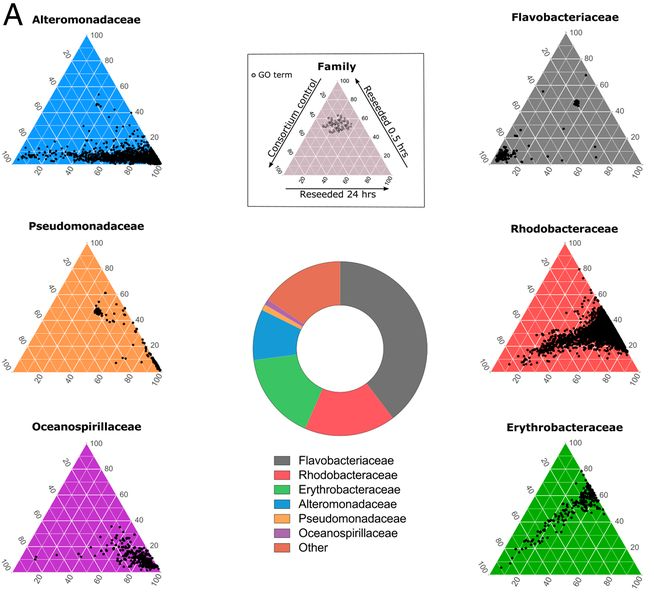

In [18]:
from IPython.display import Image
Image(filename='shibl_1a.png', width=400)

## MAGs
Six Genomes from Metagenomes available on NCBI were downloaded. Originally, I intended to use these genomes to construct the Figure 1A, and to bin my own genomes from the metagenome and compare the two. However, these genomes only represented two of the six families of bacteria present in Figure 1A. Four of them were Rhodobacteraceae
 and two were Alteromonadaceae. Therefore, checkM results on the MAGS are presented in the Genome Table below, and my bins were used in all downstream analyses presented here. 

## Metagenome
Raw reads were downloaded from NCBI and trimmed with Trimmomatic minimum length of 75, as described in Shibl et al. Host reads were removed by mapping to the diatom genome with bowtie2 (authors used bwa, but bwa output was difficult to format and sort without more documentation). Reads were assembled with Megahit, authors used "k-mer size of 127," however Megahit only allows for min or max k-mer size, so due to the lack of clarity default parameters were used here. 

### Bins
Bins were binned with metabat2, a new version than the authors used as the older version would not run successfully. Like the authors, checkM was used to assess bin quality, and prokka was used for functional annotation. Authors further refined bins with Anvi'o, as this is not a reproducible step I have not manually curated here. See Table below for comparison between the six genomes from metagenomes provided on NCBI from the paper (G.fna) and the MAGS binned here (bin.X). Authors assigned taxonomy with Microbial Genomes Atlas, with limited description of methods of assignment. Therefore, here gtdbk was used to assign lineage and taxonomy. In all figures downstream, colors match the MiGA classical taxonomy with the gtdbk taxonomy of microbial families assigned here. As the number of MAGS available on NCBI and number of bins in found here were quite different, it is not possible quantiatively compare the bins pairwise as intended. However, it can be observed below that the authors had high quality bins, although metabat2 also performed well without manual curation.


In [10]:
import pandas as pd
pd.read_csv("genome_table.csv")


,Bin,Family,Genome_Length,Completeness,Contamination
0,GCA_014872785.1_ASM1487278v1_genomic,Alteromonadaceae,4662739,91.67,0.34
1,GCA_014872805.1_ASM1487280v1_genomic,Alteromonadaceae,2510135,96.03,0.51
2,bin.13,Alteromonadaceae,2381948,91.98,0.51
3,bin.5,Alteromonadaceae,4789911,99.31,0.51
4,bin.6,Alteromonadaceae,3626652,87.79,0.34
5,bin.3,Flavobacteriaceae,3339001,98.66,0.00
6,bin.15,Litoricolaceae,2199381,94.88,1.11
7,bin.11,Nitrincolaceae,3503146,97.00,0.21
8,GCA_014872775.1_ASM1487277v1_genomic,Rhodobacteraceae,3933228,98.90,0.22
9,GCA_014872815.1_ASM1487281v1_genomic,Rhodobacteraceae,3964870,99.47,0.00


### Abundance Profile of Metagenome
The authors used Kaiju for to profile the abundance of taxa in the metagenome. However, this included a large amount of "other" and also could not finish within 24 hrs on Poseidon even with large amounts of memory and threads. Therefore, here abundance was calculated by mapping reads back to concatenated bins and calculating the coverage for each bin (see abundance_plot.R script). Below, abundance profiles calculated here are displayed with Shibl et al's abundance profile following. Colors are correlated for families regardless of microbial taxonomic system used. In particular, here, we found a much greater abundance of Alteromonadaceae than Shibl et al and a somewhat lower abundance of Sphingomonadaceae. Quantitative comparisons are not possible as abundances from publication are not provided. These differences might be in part due to the fact that kaiju is performed at a protein level, and thus it is possible that some of the reads that did not map back to bins would be categorized at a family level with kaiju. 

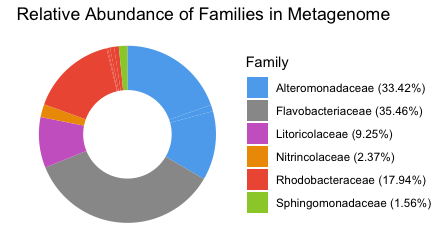

In [19]:
from IPython.display import Image
Image(filename='Abundance.png', width=400)

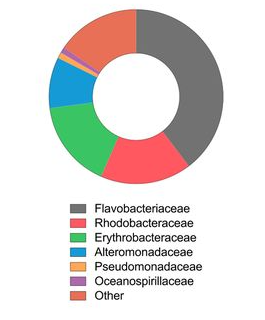

In [20]:
Image(filename='shibl_abundance.png', width=200)

## Metatranscriptome
Raw reads were downloaded from NCBI and trimmed with Trimmomatic minimum length of 75, as described in Shibl et al. 
In order to stay consistent with the authors, I did not filter out diatom reads from the metatranscriptome, although it surprised me that host reads were not filtered out of metatranscriptomes, although they were filtered out of metagenome. Following Shibl et al, paired end reads were merged on Flash v1.2.11, and rRNA fragments were removed using SortMeRNA v3.0. Shibl et al. uses SortMeRNA v2.0, however the databases to run this version were no longer supported and thus it was not possible. To compute abundance, filtered reads were then mapped to MAGS. 

### Expression Levels
In the methods Shibl et al describes using DESeq to quantify at differences in expression levels, Humann to compute functional profiling, and MetaCyc to calculate GO terms. Furthermore in the Figure Legend *Each dot depicts a unique Gene Ontology (GO) annotation associated with transcripts from each of the six major families in the metatranscriptome. The position of each dot corresponds to the percent contribution of the sample (consortium control, reseeded 0.5 h, and reseeded 24 h) relative to the total normalized abundance of transcripts annotated with the same GO term in copies per million (cpm).*

These methods are somewhat misleading. Humann2 from biobakery runs on raw reads or sam files, not DESeq output, uses MetaCyc, and outputs a XX_path_coverage.tsv consisting of pathways and percent contribution of the GO term expressed to the total normalized abundance of transcripts in that sample. Therefore, in order to get 18 XX_path_coverage.tsv files (one for each side of the six triangles), Humann would run 18 times on fastq files from each family and treatment, which would not actually be a normalized analysis. Humann2 is no longer supported, and Humann3 was exceedingly challenging to run successfuly as it is a black box tool with limited error outputs. I have successfully subset the sam files to fq files based on which family they mapped to, and sometimes Humann3 runs successfully and sometimes it does not, without any apparent error. Therefore, downstream I will explore the DESeq output.

DESeq was run on the transcriptome with default parameters. This first panel shows the log2fold change of contigs on the X axis and p adjusted value on the y axis. Overall, some taxa exhibited distrubtions of log2fold change, others it was less clear.

In order to construct the triangles, pairwise DESeq results were used. Log2fold change was scaled from 0 to 1 for each family and treatment and plotted here (see DESeq.R)



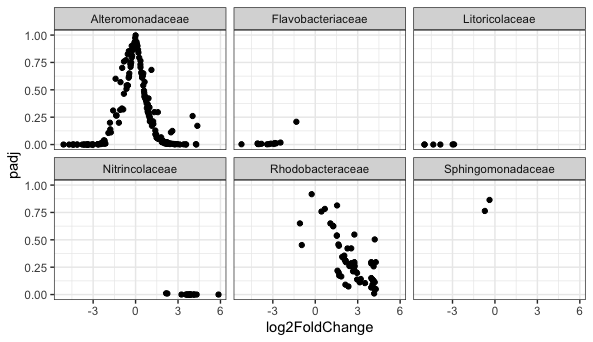

In [23]:
from IPython.display import Image
Image(filename='DESeq_output.png', width=400)

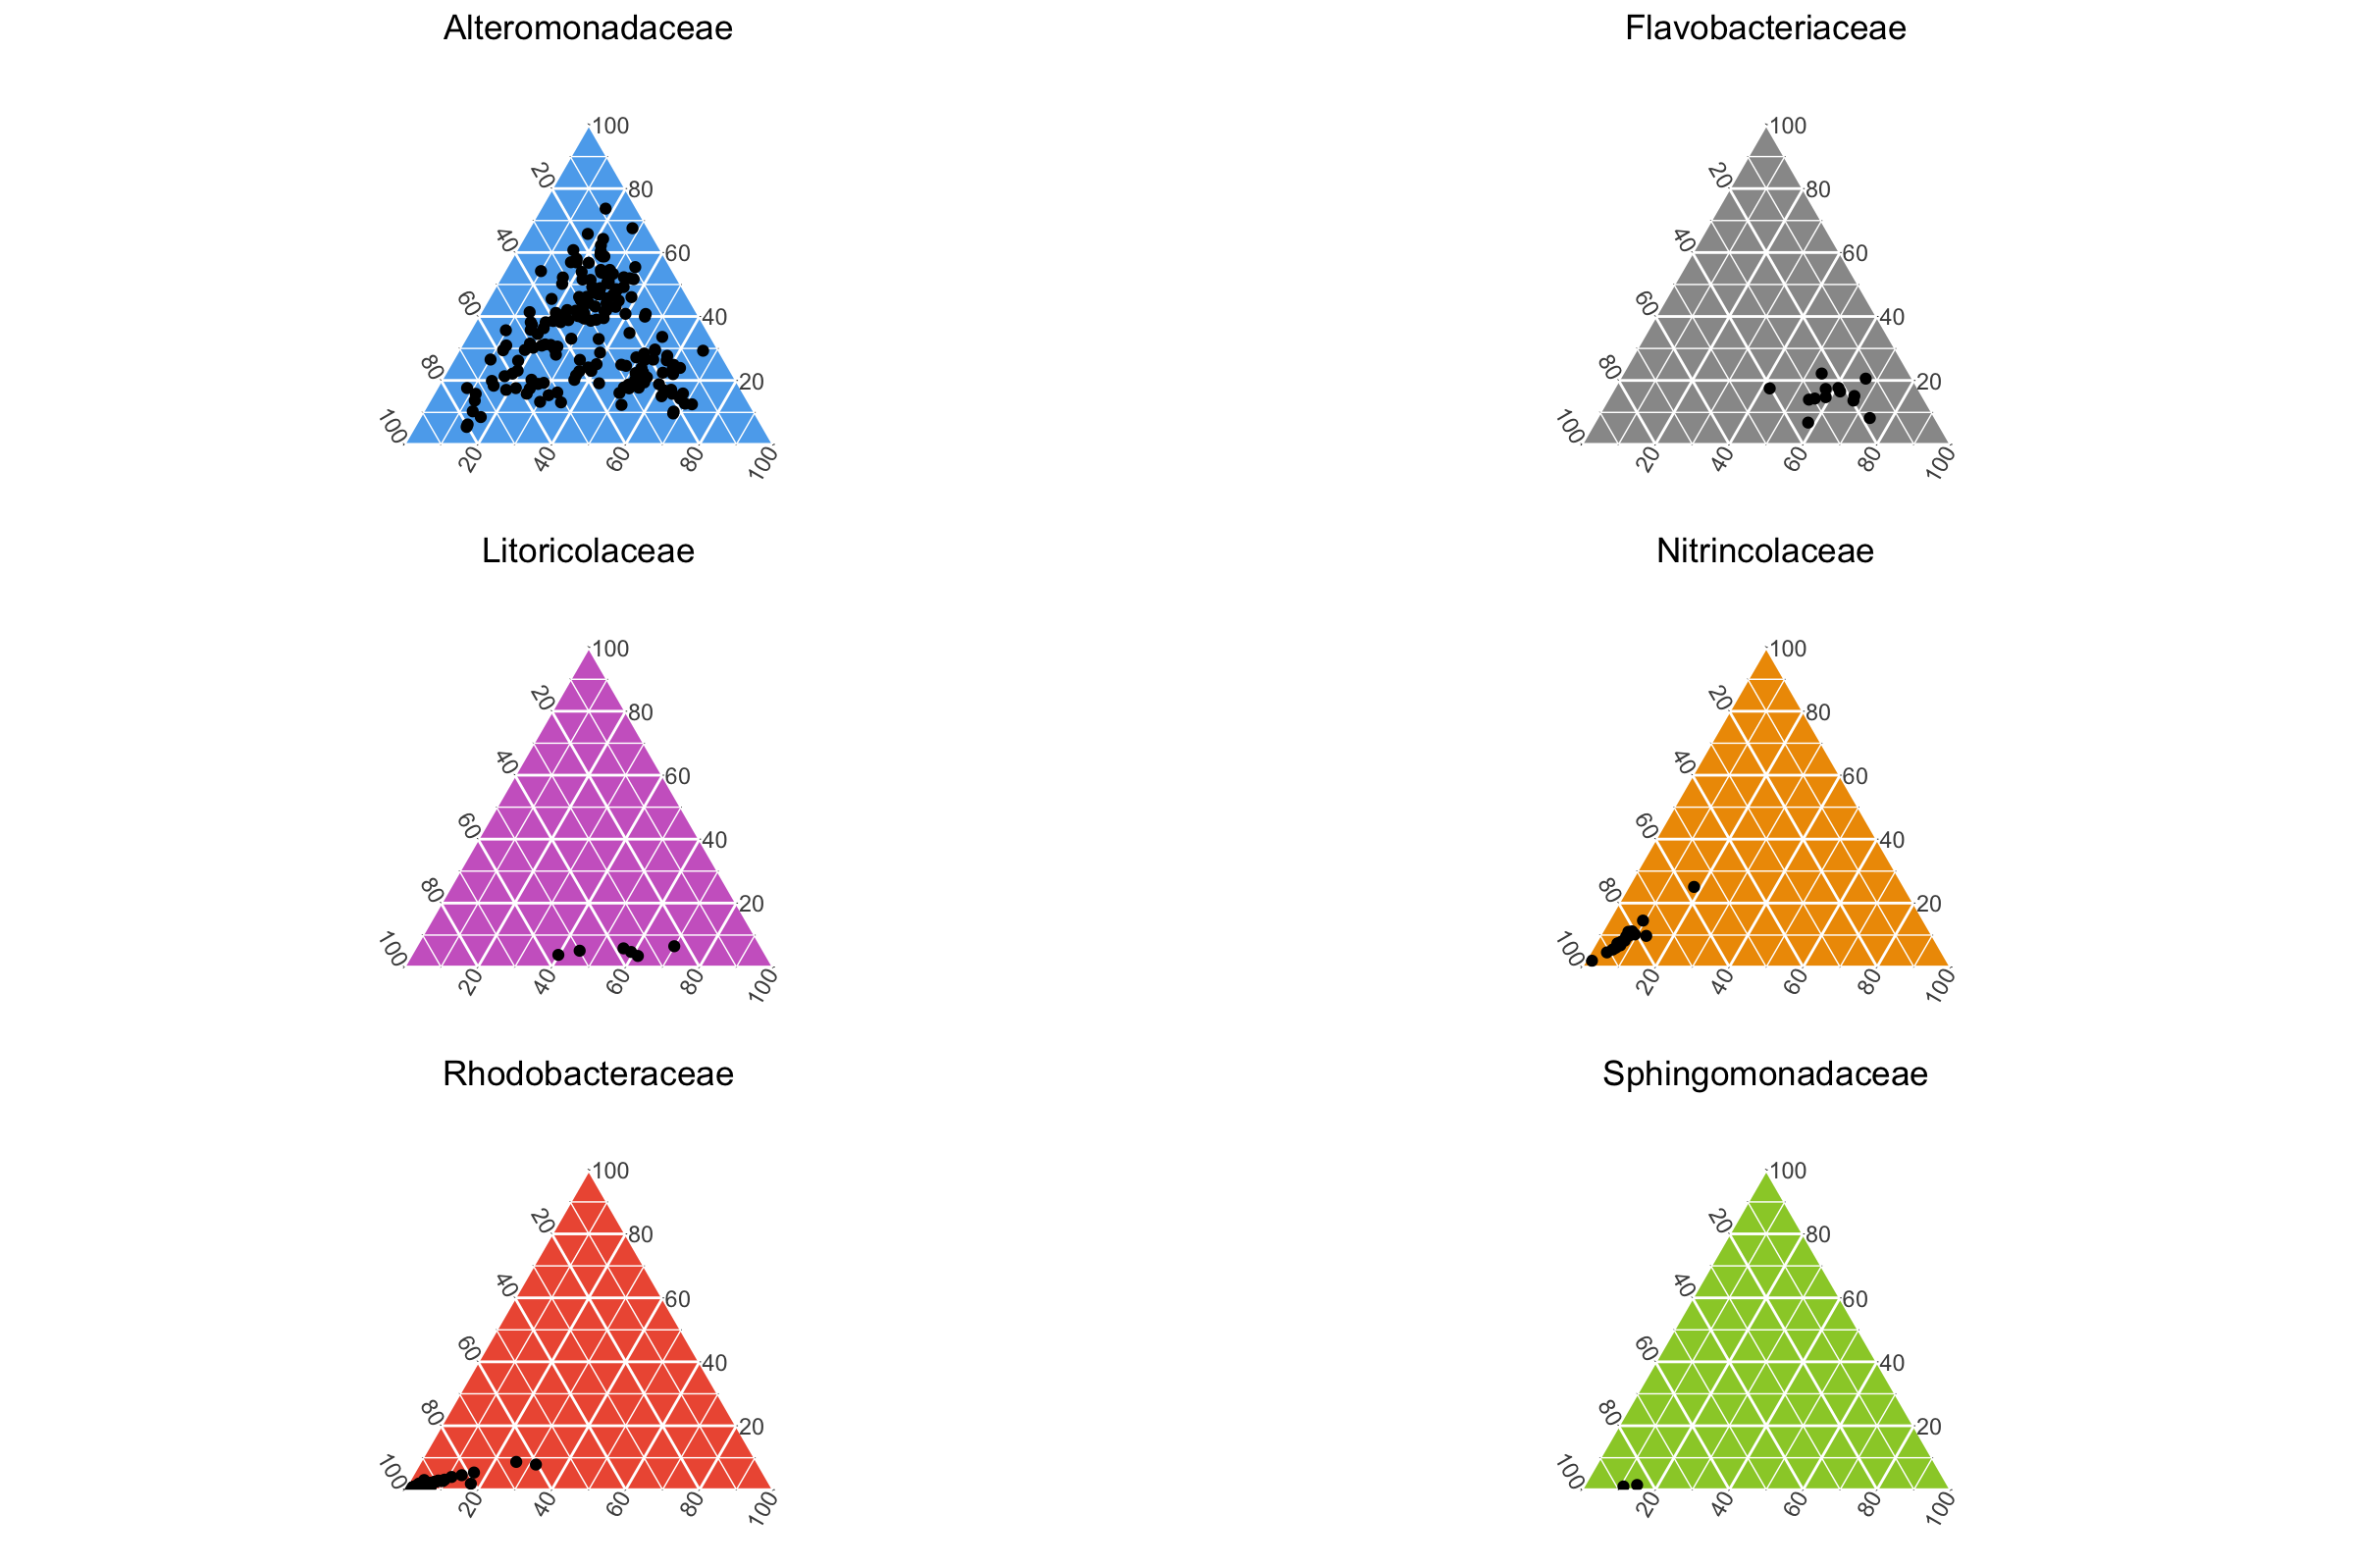

In [21]:
from IPython.display import Image
Image(filename='Expression_Panels.png', width=400)

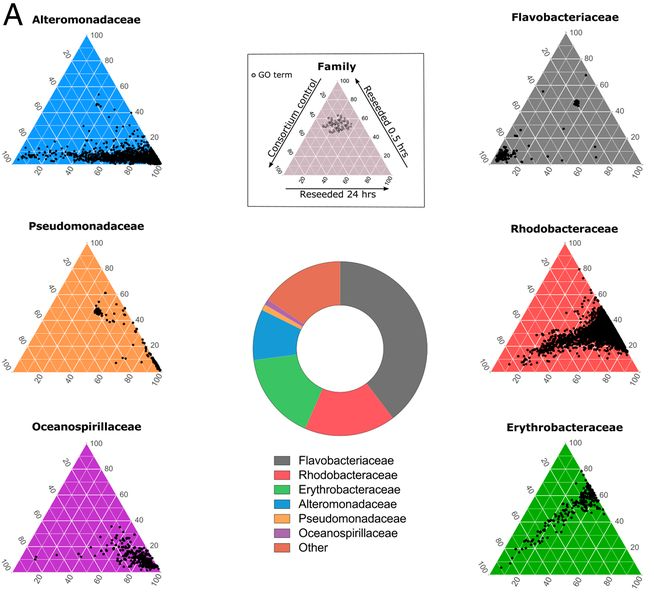

In [22]:
from IPython.display import Image
Image(filename='shibl_1a.png', width=400)

###  Conclusions

Overall, it is challenging to make conclusions on the variation in expression across experimental treatments and family taxa between Shibl et al and the analysis here due to different types of data being plotted, and data being used (the MAGS used by Shibl et al were not all available online.) This shows the importance of carefully documenting all analyses, file conversions, and quantitative analyses so that figures may be reproduced. In particular, thorough descriptions of the methods that blackbox pipelines like Humann2 use would allow for authors to reproduce tools, even when they are no longer available. Additionally, providing intermediate files that can be used as "checkpoints" would also allow researchers with fewer computational resources to analyze data at any given point in the pipeline.